<a href="https://www.kaggle.com/aminizahra/titanic-prediction-knn?scriptVersionId=88419192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>🚢🛳 Titanic Prediction 🛳🚢</strong></p>

<center><img src="https://s4.uupload.ir/files/aurora-titanic-sinking-4cbae38_vrtg.jpg" border="0" alt="titanic" /></center>

<div style="color: #393e46;
           display:fill;
           border-radius:0px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#00adb5 ;
           font-size:40px;
           font-family:'Times New Roman';
           letter-spacing:0.5px;">
<h1 style="text-align: center; font-size:40px;
           padding: 15px;
           color:#393e46;">
k-nearest neighbors algorithm(KNN)
</h1>    
<hr>

<p style="color:#393e46; font-family:'Times New Roman'; font-size:20px;">The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.</p>
    
<h1 style="color:white; font-family:'Times New Roman';">When do we use KNN algorithm?</h1>
<p style="font-family:'Times New Roman'; font-size:20px;">KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power
</p>
    
<h1 style="color:white; font-family:'Times New Roman';">How does the KNN algorithm work?</h1>
<p style="font-family:'Times New Roman'; font-size:20px;">Let’s take a simple case to understand this algorithm. Following is a spread of red circles (RC) and green squares (GS) :</p>
    
<center><img src="https://s4.uupload.ir/files/scenario1_y6lo.jpg" border="0" alt="fig1" /></center>
    
<p style="font-family:'Times New Roman'; font-size:20px">You intend to find out the class of the blue star (BS). BS can either be RC or GS and nothing else. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. Refer to the following diagram for more details:</p>

<center><img src="https://s4.uupload.ir/files/scenario2_fs9u.jpg" border="0" alt="fig2" /></center>
    
<p style="font-family:'Times New Roman'; font-size:20px;">The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm. Next, we will understand what are the factors to be considered to conclude the best K.</p>
    
<h1 style="color:white; font-family:'Times New Roman'; font-size:20px;">How do we choose the factor K?</h1>
<p>First let us try to understand what exactly does K influence in the algorithm. If we see the last example, given that all the 6 training observation remain constant, with a given K value we can make boundaries of each class. These boundaries will segregate RC from GS. In the same way, let’s try to see the effect of value “K” on the class boundaries. The following are the different boundaries separating the two classes with different values of K.</p>
    
<center><img src="https://s4.uupload.ir/files/k-judgement_b2aw.jpg" border="0" alt="fig3" /></center>
    
<center><img src="https://s4.uupload.ir/files/k-judgement2_mg75.jpg" border="0" alt="fig4" /></center>
    
<p style="font-family:'Times New Roman'; font-size:20px;">If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value. Following is the curve for the training error rate with a varying value of K :</p>

<center><img src="https://s4.uupload.ir/files/training-error_fm6y.jpg" border="0" alt="fig5" /></center>
    
<p style="font-family:'Times New Roman'; font-size:20px;">As you can see, the error rate at K=1 is always zero for the training sample. This is because the closest point to any training data point is itself.Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:</p>
    
<center><img src="https://s4.uupload.ir/files/training-error_11_llde.jpg" border="0" alt="fig6" /></center>
    
<p style="font-family:'Times New Roman'; font-size:20px;">This makes the story more clear. At K=1, we were overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.</p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>📤 Import Libraries</strong></p> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

%matplotlib inline

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Read Datasets</strong></p>

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')

df_test = pd.read_csv('../input/titanic/test.csv') 

df_y_test = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
df_test['Survived'] = df_y_test['Survived']

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>💾 Check out the Data</strong></p>

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


<AxesSubplot:>

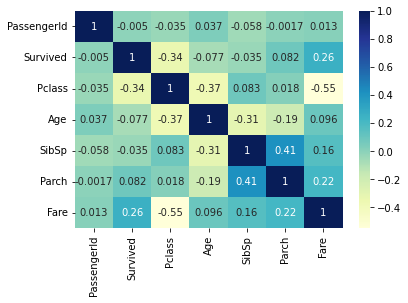

In [6]:
sns.heatmap(df_train.corr(), annot=True,cmap="YlGnBu")

<AxesSubplot:>

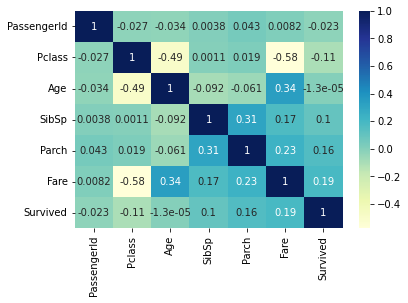

In [7]:
sns.heatmap(df_test.corr(), annot=True,cmap="YlGnBu")

<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Data preparation</strong></p>


<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Train set</strong></p>

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
pd.DataFrame([df_train.corr()['Survived'].sort_values()])

,Pclass,Age,SibSp,PassengerId,Parch,Fare,Survived
Survived,-0.338481,-0.077221,-0.035322,-0.005007,0.081629,0.257307,1.0


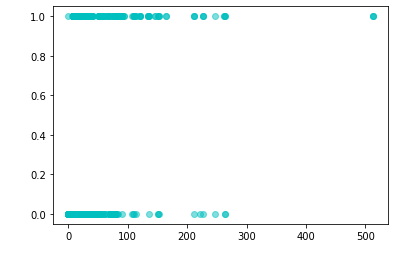

In [10]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots()

X=df_train['Fare']
y=df_train['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y,'co', alpha=0.5)

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
100*(df_train.isnull().sum()/len(df_train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [14]:
nan_percent= missing_percent(df_train)

In [15]:
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Embarked'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

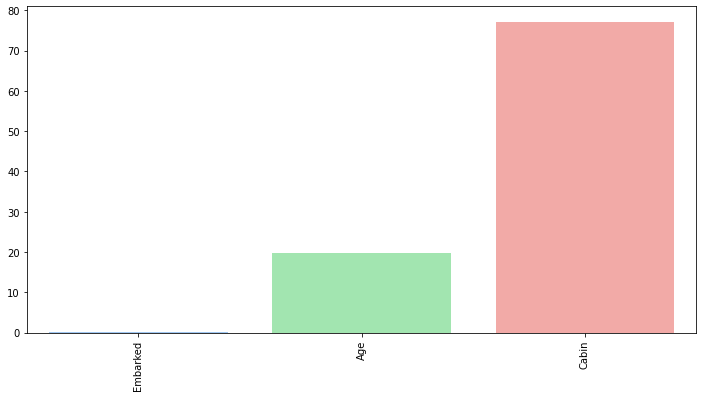

In [16]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [17]:
nan_percent[nan_percent<1].index

Index(['Embarked'], dtype='object')

In [18]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
df_train= df_train.dropna(axis=0, subset=['Embarked'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

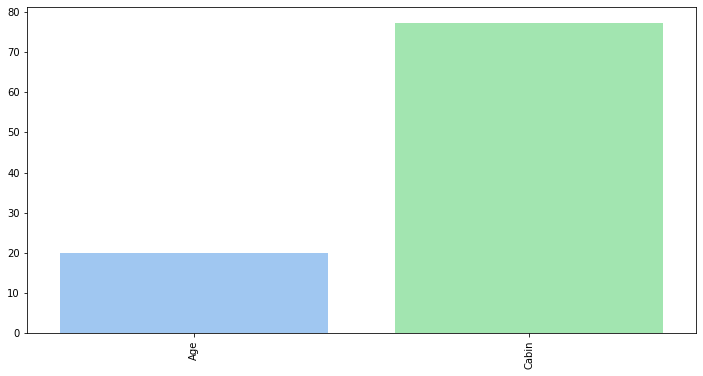

In [20]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [21]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

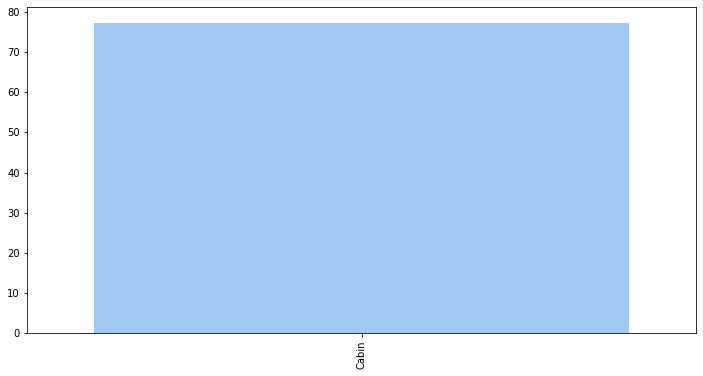

In [22]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [23]:
df_train=df_train.drop(['Cabin'], axis=1)

In [24]:
nan_percent= missing_percent(df_train)
nan_percent

Series([], dtype: float64)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Test set</strong></p>

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [26]:
pd.DataFrame([df_test.corr()['Survived'].sort_values()])

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
Survived,-0.108615,-0.023245,-0.000013,0.099943,0.15912,0.191514,1.0


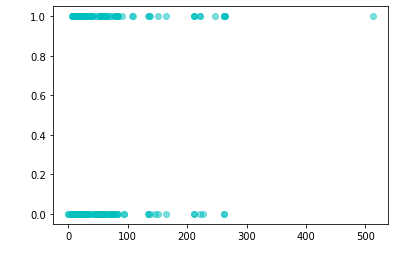

In [27]:
fig, ax = plt.subplots()

X=df_test['Fare']
y=df_test['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'co', alpha=0.5)

In [28]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
100*(df_test.isnull().sum()/len(df_test))

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [30]:
nan_percent= missing_percent(df_test)
nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Fare'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

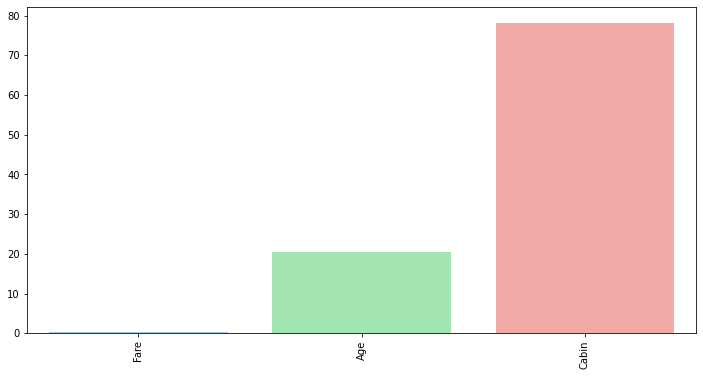

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [32]:
nan_percent[nan_percent<1].index

Index(['Fare'], dtype='object')

In [33]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [34]:
df_test= df_test.dropna(axis=0, subset=['Fare'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

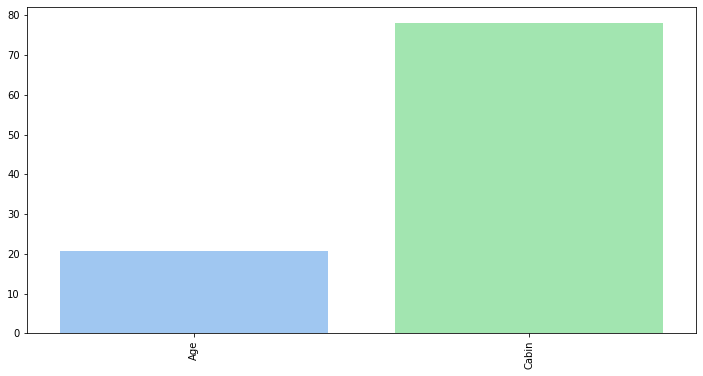

In [35]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)


In [36]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
Survived         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

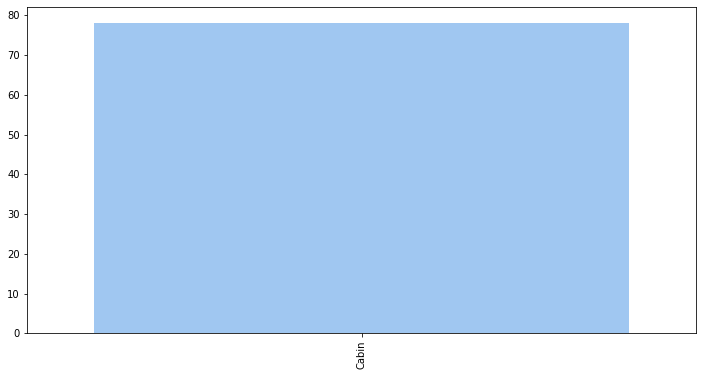

In [37]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [38]:
df_test=df_test.drop(['Cabin'], axis=1)

In [39]:
nan_percent= missing_percent(df_test)
nan_percent

Series([], dtype: float64)

In [40]:
df_train.drop(['Name','Ticket', 'PassengerId'], axis = 1, inplace=True)
df_test.drop(['Name','Ticket', 'PassengerId'], axis = 1, inplace=True)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Hint: Now, we don't have any Missing Data.</strong></p>

<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Creating Dummy Variables</strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Train set</strong></p>

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [42]:
df_train.shape

(889, 8)

In [43]:
df_train['Survived'] = df_train['Survived'].apply(str)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


In [45]:
df_train['Pclass'] = df_train['Pclass'].apply(str)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.5+ KB


In [47]:
df_train_num = df_train.select_dtypes(exclude='object')
df_train_obj = df_train.select_dtypes(include='object')

In [48]:
df_train_obj.drop('Survived', axis = 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_train_obj = pd.get_dummies(df_train_obj, drop_first=True)

In [50]:
Final_train_df = pd.concat([df_train_num, df_train_obj,df_train['Survived']], axis=1)

Final_train_df

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,7.2500,0,1,1,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,0,1
2,26.0,0,0,7.9250,0,1,0,0,1,1
3,35.0,1,0,53.1000,0,0,0,0,1,1
4,35.0,0,0,8.0500,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,0,1,0
887,19.0,0,0,30.0000,0,0,0,0,1,1
888,28.0,1,2,23.4500,0,1,0,0,1,0
889,26.0,0,0,30.0000,0,0,1,0,0,1


In [51]:
Final_train_df.shape

(889, 10)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Test set</strong></p>

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [53]:
df_test.shape

(417, 8)

In [54]:
df_test['Survived'] = df_test['Survived'].apply(str)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.3+ KB


In [56]:
df_test['Pclass'] = df_test['Pclass'].apply(str)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    object 
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 29.3+ KB


In [58]:
df_test_num = df_test.select_dtypes(exclude='object')
df_test_obj = df_test.select_dtypes(include='object')

In [59]:
df_test_obj.drop('Survived', axis = 1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
df_test_obj = pd.get_dummies(df_test_obj, drop_first=True)

In [61]:
Final_test_df = pd.concat([df_test_num, df_test_obj,df_test['Survived']], axis=1)

In [62]:
X_train=Final_train_df.drop('Survived', axis = 1)
y_train=Final_train_df['Survived']

X_test=Final_test_df.drop('Survived', axis = 1)
y_test = Final_test_df['Survived']

In [63]:
X_train.shape

(889, 9)

In [64]:
X_test.shape

(417, 9)

<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Scaling Data</strong></p>

In [65]:
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [66]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Build the model</strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Train</strong></p>

In [67]:
knn_model= KNeighborsClassifier(n_neighbors=1)

In [68]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Predict</strong></p>

In [69]:
y_pred= knn_model.predict(scaled_X_test)

In [70]:
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
0,0,0
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Evaluate model</strong></p>

In [71]:
accuracy_score(y_test, y_pred)

0.7410071942446043

In [72]:
confusion_matrix(y_test, y_pred)

array([[202,  63],
       [ 45, 107]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       265
           1       0.63      0.70      0.66       152

    accuracy                           0.74       417
   macro avg       0.72      0.73      0.73       417
weighted avg       0.75      0.74      0.74       417



<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Elbow Method for Choosing Reasonable K Values</strong></p>

In [74]:
test_error_rate= []


for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [75]:
test_error_rate

[0.25899280575539574,
 0.1990407673860911,
 0.2302158273381295,
 0.20623501199040772,
 0.18944844124700244,
 0.1294964028776978,
 0.1390887290167866,
 0.12709832134292565,
 0.1462829736211031,
 0.12470023980815348,
 0.11990407673860914,
 0.11750599520383698,
 0.1151079136690647,
 0.1151079136690647,
 0.12709832134292565,
 0.12230215827338131,
 0.11750599520383698,
 0.11031175059952036,
 0.1151079136690647,
 0.12470023980815348,
 0.1390887290167866,
 0.12470023980815348,
 0.13189448441246998,
 0.13189448441246998,
 0.13669064748201443,
 0.13189448441246998,
 0.13189448441246998,
 0.13429256594724226,
 0.12470023980815348]

Text(0.5, 0, 'K Value')

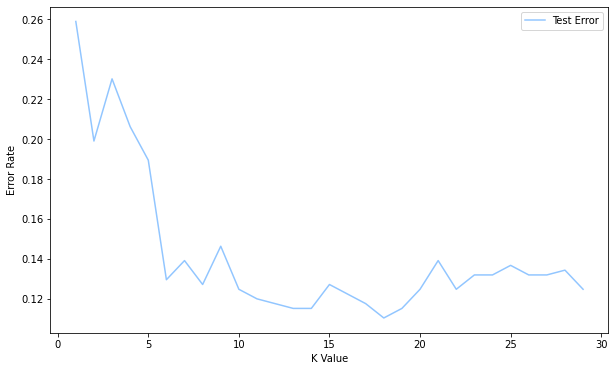

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Creating a Pipeline to find K value</strong></p>

In [77]:
scaler= StandardScaler()

In [78]:
knn= KNeighborsClassifier()

In [79]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [80]:
operations= [('scaler', scaler), ('knn', knn)]

In [81]:
pipe= Pipeline(operations)

In [82]:
k_values= list(range(1, 20))

In [83]:
param_grid= {'knn__n_neighbors': k_values}

In [84]:
full_cv_classifier= GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [85]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [86]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=12))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=12),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 12,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [87]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Final Model</strong></p>

In [88]:
scaler= StandardScaler()
knn14= KNeighborsClassifier(n_neighbors=14)
operations= [('scaler', scaler), ('knn14', knn14)]

In [89]:
pipe= Pipeline(operations)

In [90]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [91]:
pipe_pred= pipe.predict(X_test)
y_pred_knn=pipe_pred

In [92]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       265
           1       0.93      0.74      0.82       152

    accuracy                           0.88       417
   macro avg       0.90      0.85      0.87       417
weighted avg       0.89      0.88      0.88       417



In [93]:
sample= X_test.iloc[102]

In [94]:
sample

Age           27.00
SibSp          0.00
Parch          0.00
Fare           7.75
Pclass_2       0.00
Pclass_3       1.00
Sex_male       1.00
Embarked_Q     1.00
Embarked_S     0.00
Name: 102, dtype: float64

In [95]:
sample.values

array([27.  ,  0.  ,  0.  ,  7.75,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ])

In [96]:
sample.values.reshape(1, -1)

array([[27.  ,  0.  ,  0.  ,  7.75,  0.  ,  1.  ,  1.  ,  1.  ,  0.  ]])

In [97]:
pipe.predict(sample.values.reshape(1, -1))

array(['0'], dtype=object)

In [98]:
pipe.predict_proba(sample.values.reshape(1, -1))

array([[0.92857143, 0.07142857]])

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Submitting the predicted data</strong></p>

In [99]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test.index
submission['Survived'] = y_pred_knn
submission.to_csv('my-submission.csv',index=False)

<div style="color: #393e46;
           display:fill;
           border-radius:0px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#00adb5 ;
           font-size:49px;
           font-family:'Comic Sans MS';
           letter-spacing:0.5px;">
<h1 style="text-align: center;
           padding: 15px;
           color:#393e46;">
Finished!
</h1>    
<hr>

<p style="color:#393e46;">If you liked this text or it was useful for you, please give me feedback (Upvoted & Comments).</p>